In [30]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [31]:
train_set = pd.read_csv("./train_data.csv")
test_set = pd.read_csv("./test_data.csv")
sample_solution = pd.read_csv("./sample_solution.csv")

In [32]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [33]:
train_set.head(10)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
5,6,Air_India,AI-636,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
6,7,Vistara,UK-834,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054
7,8,Air_India,AI-505,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
8,9,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,15.92,12,11383
9,10,Air_India,AI-538,Chennai,Night,one,Afternoon,Mumbai,Economy,16.50,18,4357


In [34]:
train_set[['flight_c','flight_n']] = train_set['flight'].str.split('-',expand=True)
test_set[['flight_c','flight_n']] = test_set['flight'].str.split('-',expand=True)

train_set['flight_n'] = train_set['flight_n'].astype(dtype=np.int64)
test_set['flight_n'] = test_set['flight_n'].astype(dtype=np.int64)

In [35]:
train_set.drop(columns=['id','flight'],inplace=True)
test_set.drop(columns=['id','flight'],inplace=True)

In [36]:
train_set.nunique()

airline                6
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             404
days_left             49
price               4420
flight_c               6
flight_n            1058
dtype: int64

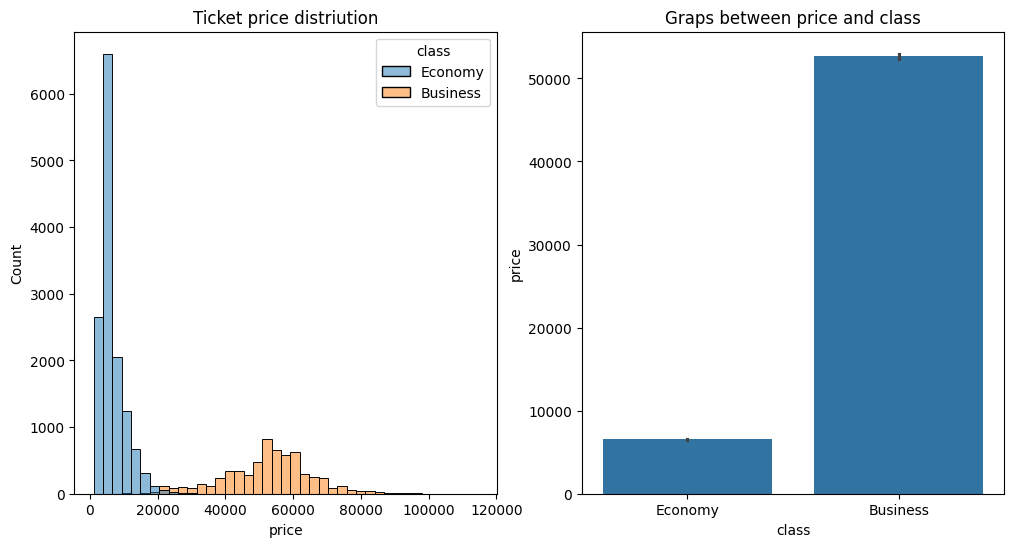

In [37]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.histplot(train_set,x=train_set['price'],hue=train_set['class'],ax=ax[0])
sns.barplot(data=train_set,x=train_set['class'],y=train_set['price'],ax=ax[1])
ax[0].set_title('Ticket price distriution')
ax[1].set_title('Graps between price and class')
plt.show()

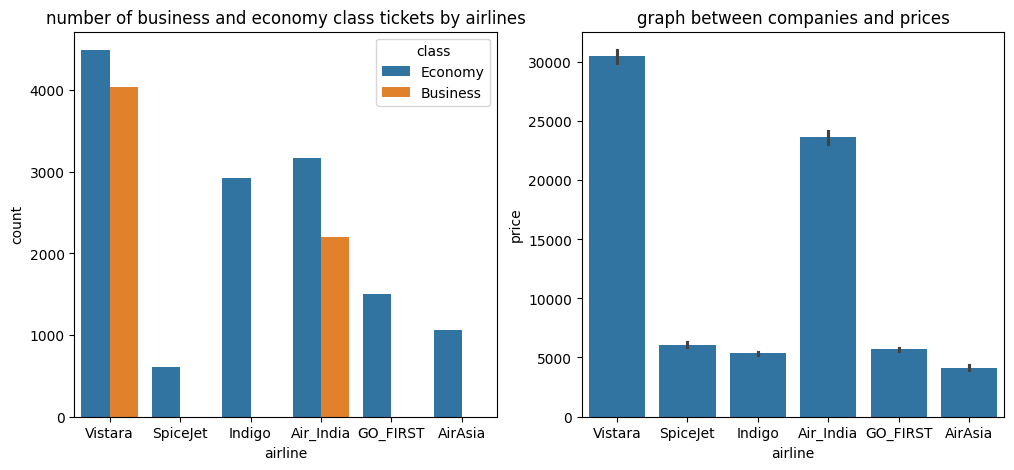

In [38]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=train_set,x=train_set['airline'],hue=train_set['class'],ax=ax[0])
sns.barplot(data=train_set,x=train_set['airline'],y=train_set['price'],ax=ax[1])
ax[0].set_title('number of business and economy class tickets by airlines')
ax[1].set_title('graph between companies and prices')
plt.show()

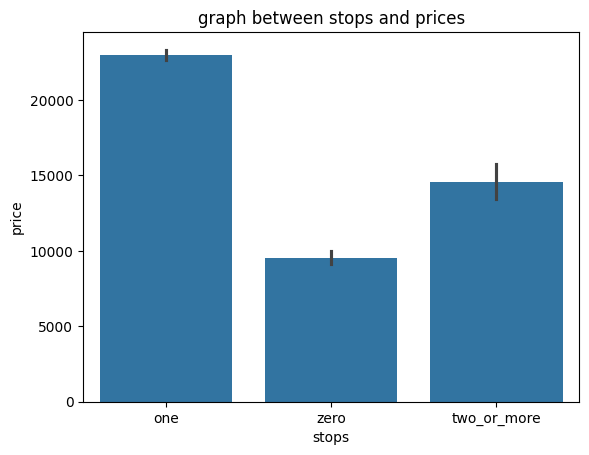

In [39]:
sns.barplot(data=train_set,x=train_set['stops'],y=train_set['price'])
plt.title('graph between stops and prices')
plt.show()

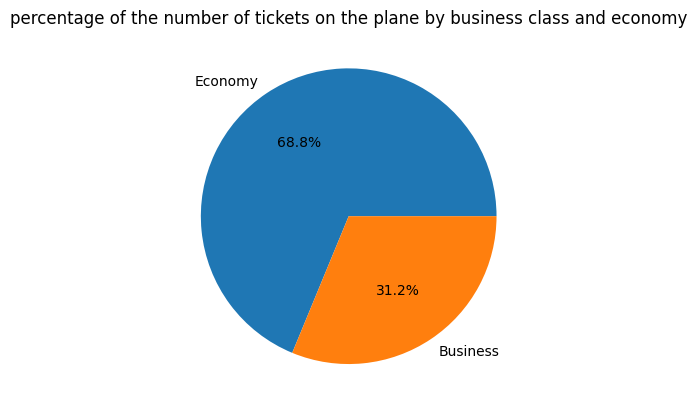

In [40]:
plt.pie(train_set[['class']].value_counts(),labels=['Economy','Business'],autopct='%1.1f%%')
plt.title('percentage of the number of tickets on the plane by business class and economy')
plt.show()

In [41]:
x=train_set.drop('price',axis=1)
y=train_set[['price']]

In [42]:
x=pd.get_dummies(x)
test_set=pd.get_dummies(test_set)

In [43]:
model=RandomForestRegressor()
model.fit(x,y)

c:\Users\Sardor\.virtualenvs\C++ amaliyot\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [44]:
prediction=model.predict(test_set)

In [45]:
print(mean_absolute_error(y.take(np.random.permutation(5000)),prediction))
print(np.sqrt(mean_squared_error(y.take(np.random.permutation(5000)),prediction)))

23251.268957861903
32717.884083522607


In [46]:
sub=pd.DataFrame({'id':sample_solution.id,'price':prediction})
sub.head()

,id,price
0,1,54723.71
1,2,63603.38
2,3,23460.68
3,4,2398.56
4,5,5628.37


In [47]:
sub.to_csv('solutionn',index=False)

In [48]:
sub.head()

,id,price
0,1,54723.71
1,2,63603.38
2,3,23460.68
3,4,2398.56
4,5,5628.37
